# Loan Status Prediction

Ref: [Sidhardhan's ML projects](https://www.youtube.com/watch?v=XckM1pFgZmg&list=PLfFghEzKVmjvuSA67LszN1dZ-Dd_pkus6&index=5)

Author: Dathabase

> ### **Aim:**
To predict whether a person is eligible for a loan or not using support vector machine algorithm

> ### **Workflow:**

1. Get info regarding potential customers and respective labels
1. Data Pre-processing
1. Train, Test, Split
1. Use Support Vector Machine (supervised learning)
1. Train model using SVM to predict loan eligibility of an individual

In [2]:
# importing required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## **Data Collection and Pre-processing**

This dataset is taken from kaggle [(link)](https://www.kaggle.com/datasets/ninzaami/loan-predication).

**Background:** Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 

In [3]:
loan_df = pd.read_csv('loan_data.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Columns are self-explanatory so wouldn't go into the detail of stating their descriptions. 
- `ApplicantIncome`, `CoapplicantIncome` and `LoanAmount` are given in units of \$1000
- `Loan_Amount_Term` is given in days
- `Credit_History`: 1 = good (high probability that the loan can be approved), 0 = bad

In [4]:
print(f"The dataframe has {loan_df.shape[0]} rows and {loan_df.shape[1]} columns")
print("Here are some basic stats regarding the numerical data:")
loan_df.describe()

The dataframe has 614 rows and 13 columns
Here are some basic stats regarding the numerical data:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# check for missing values
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Apart from the `Loan_ID`, `Education`, `ApplicantIncome`, `CoapplicantIncome`, `Property_Area` and `Loan_Status` columns, there is a good amount of important information missing from the other columns. However considering the whole dataset, max 8% of the data is missing; hence it would be better to drop the rows where the values are missing

In [6]:
# replace null values with empty string
loan_df.dropna(inplace=True)

In [7]:
# check the amount of data points
loan_df.shape

(480, 13)

Turn the alphabetical values of `Y`, `N` in `Loan_Status` column into numerical values of `1`, `0` respectively to make it easier for the model to process our data

In [8]:
# label encoding
loan_df.replace({'Loan_Status':{'Y':1,'N':0}}, inplace=True)

Replace value of `3+` to `4` in `Dependents` column

In [9]:
# label encoding
loan_df.replace({'Dependents':{'3+':4}}, inplace=True)

Visualise the relationship of different columns in the dataframe

**Summary of inferences:** There is a higher chance of getting your loan approved, if:
- you're a graduate
- you're married
- you're a male
- you're not self-employed
- you live in an urban/semi-urban area
- you have no dependents


In [10]:
def countplot(col_list, target, df):
  '''
  function that accepts a list of columns and plots a countplot (from seaborn)
  with respect to a particular column i.e. target, for a particular dataframe
  '''
  # multi-grid plot
  fig, axs = plt.subplots(ncols=len(col_list), figsize=(15,5))
  plt.tight_layout() # automatically fits all subplots nicely
  
  for col in col_list:
    sns.countplot(x=col, hue = target, data=df, ax=axs[col_list.index(col)])


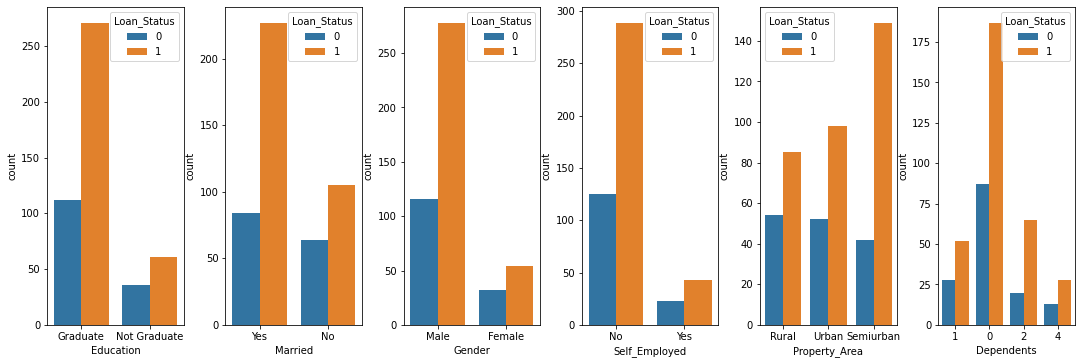

In [11]:
# plots
countplot(['Education', 'Married', 'Gender', 'Self_Employed', 'Property_Area', 'Dependents'], 'Loan_Status', loan_df)

After seeing the different relationships, now convert all binary categorial data to numbers:
- `Gender`: Male = 1, Female = 0
- `Married`: Yes = 1, No = 0
- `Self_Employed`: Yes = 1, No = 0
- `Property_Area`: Rural = 0, Semi-urban = 1, Urban =2
- `Education`: Graduate = 1, Not Graduate = 0

In [12]:
# label encoding: gender, maritial status, 
loan_df.replace({'Gender':{'Male':1,'Female':0},
                 'Married':{'Yes':1,'No':0},
                 'Self_Employed':{'Yes':1, 'No':0},
                 'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban':2},
                 'Education':{'Graduate':1, 'Not Graduate':0}}, inplace=True)

In [13]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


Separate the input data, X i.e. **features** (all except `Loan_ID` and `Loan_status`) and the data to be predicted, Y i.e. **labels** (`Loan_status`)

In [14]:
X = loan_df.drop(columns=['Loan_ID', 'Loan_Status'], axis=1)
Y = loan_df.loc[:,'Loan_Status']

## **Train, Test, Split**

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    random_state = 2,
                                                    stratify = Y,
                                                    test_size = 0.1)

Parameters:
- `X_train` = training data; `Y_train` = corresponding labels of the training data
- `X_test` = testing data; `Y_test` = corresponding labels of the testing data
- 10% of data will be in the testing set => `test_size = 0.1`
- should spilt the data similarly whenever the function is called => `random_state = 2`

## **Model Training and Evaluation**

In [16]:
loan_svm_model = svm.SVC(kernel='linear')

In [17]:
# fit training data
loan_svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [18]:
# accuracy on training data
X_train_pred = loan_svm_model.predict(X_train)
accuracy_X_train_pred = accuracy_score(X_train_pred, Y_train)
print(f"Accuracy on Training data: {accuracy_X_train_pred*100:.1f}%")

Accuracy on Training data: 79.9%


In [19]:
# accuracy on testing data
X_test_pred = loan_svm_model.predict(X_test)
accuracy_X_test_pred = accuracy_score(X_test_pred, Y_test)
print(f"Accuracy on Testing data: {accuracy_X_test_pred*100:.1f}%")

Accuracy on Testing data: 83.3%


## **Making a prediction system**


Choose a random index from the `X_test` data and see if the model correctly predicts the result

In [20]:
from random import choice

def rand_row_idx(test_set):
  '''
  function that accepts a test set and returns a random row index
  along with the test set
  '''
  idxs = np.asarray(test_set.index) # convert index list to array
  return idxs, choice(idxs) # selects a single row index at random

In [21]:
# check whether row index choice is in the list of indices of the training set
row_idx = rand_row_idx(X_test)[1]

if row_idx in rand_row_idx(X_train)[0]:
  print(True)
else:
  print(False)

print(row_idx)

False
543


Get a set of values corresponding to the random row index and use your model to make a prediction

In [22]:
# reshape input data
new_input = np.asarray(X_test.loc[row_idx,:]).reshape(1,-1)

# make prediction
new_input_pred = loan_svm_model.predict(new_input)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [23]:
if new_input_pred[0] == 1:
  print("The Loan is approved")
elif new_input_pred[0] == 0:
  print("The Loan is not approved")
else:
  print("Invalid prediction")

if new_input_pred == Y_test[row_idx]:
  print("This is a correct prediction :)")
else:
  print("This is an incorrect prediction :(")

The Loan is approved
This is a correct prediction :)
